In [2]:
# -*- coding: utf-8 -*-
# Basit Doğrusal Regresyon: Ev_Buyuklugu -> Fiyat
# Tam çalışan örnek (train/test bölme, eğitim, tahmin, MSE/RMSE, R^2, katsayılar)

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1) Veriyi hazırlama

data = {
    "Ev_Buyuklugu": [120, 250, 175, 300, 220],
    "Fiyat":        [300000, 600000, 400000, 700000, 500000]
}

df = pd.DataFrame(data)  # veriyi DataFrame'e çevir

# Özellik (X) ve hedef (y)
X = df[["Ev_Buyuklugu"]]  # 2D (n,1)
y = df["Fiyat"]           # 1D (n,)


# 2) Train/Test ayırma

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Modeli oluştur ve eğit

model = LinearRegression()
model.fit(X_train, y_train)

# 4) Tahmin ve değerlendirme

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("==== Sonuçlar ====")
print(f"Test MSE : {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"R^2 Skoru: {r2:.4f}")

# Katsayılar (y = a*x + b)
a = model.coef_[0]
b = model.intercept_
print(f"Model Denklemi: Fiyat ≈ {a:.2f} * Ev_Buyuklugu + {b:.2f}")


# 5) Örnek tahmin (istersen değeri değiştir)

yeni_ev = pd.DataFrame({"Ev_Buyuklugu": [200]})
tahmin = model.predict(yeni_ev)[0]
print(f"200 m² bir ev için tahmini fiyat: {tahmin:,.0f} TL")


==== Sonuçlar ====
Test MSE : 461,499,854.78
Test RMSE: 21,482.55
R^2 Skoru: nan
Model Denklemi: Fiyat ≈ 2238.22 * Ev_Buyuklugu + 18963.66
200 m² bir ev için tahmini fiyat: 466,607 TL


c:\Users\bunco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## HASTALIK VAR MI 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# veriyi hazırlama : yaş, kan basıncını , kolestrol ve hastalık durumu verisini
data = {
    'Yas': [25,50,45,30,60],
    'Kan_Basinci': [120,140,130,110,150],
    'Kolestrol' : [180,240,200,160,220],
    'Hastalik': [0,1,1,0,1]  # 0 hayır , 1 evet
}

df = pd.DataFrame(data)

X = df[['Yas', 'Kan_Basinci', 'Kolestrol']]
y = df['Hastalik']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
# print(f"Model Doğruluk Oranı: {accuracy}")

# Kullanıcıdan veri alarak tahmin yapma
yas = int(input("Yaşınızı girin: "))
kan_basinci = int(input("Kan basıncınızı girin: "))
kolestrol = int(input("Kolestrol seviyenizi girin: "))

kullanici_verisi = pd.DataFrame([[yas, kan_basinci, kolestrol]], columns=['Yas', 'Kan_Basinci', 'Kolestrol'])

tahmin = classifier.predict(kullanici_verisi)
sonuc = "Hastalık var" if tahmin[0] == 1 else "Hastalık Yok"
print(f"Tahmin : {sonuc}")


## yaşa göre hasta dağılımı görselleştirme 

Aktif klasör: c:\Users\bunco\OneDrive\Masaüstü\20days-Nilay\notebooks
İlk 5 satır:
   Yas  Kan_Basinci  Kolesterol  Hastalik
0   58          118         228         0
1   48          133         208         1
2   34          110         181         1
3   62          153         245         1
4   27          117         237         1


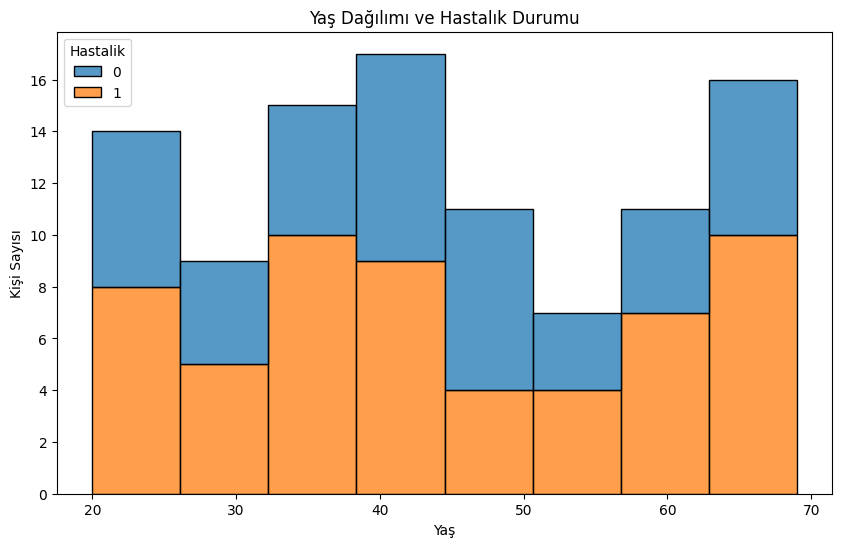

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Çalışma klasörünü ve dosya yolunu kontrol et
print("Aktif klasör:", Path.cwd())

# Excel dosyasının tam yolunu kur (notebooks klasöründen bir üstteki data klasörü)
excel_path = Path("../data/karar_agaci_veri_100.xlsx")

if not excel_path.exists():
    raise FileNotFoundError(f"Excel bulunamadı: {excel_path.resolve()}")

# 2. Excel dosyasını oku
df = pd.read_excel(excel_path, engine="openpyxl")
print("İlk 5 satır:")
print(df.head())

# 3. Görselleştirme
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Yas', hue='Hastalik', multiple='stack', kde=False)
plt.title('Yaş Dağılımı ve Hastalık Durumu')
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.show()


Aktif klasör: c:\Users\bunco\OneDrive\Masaüstü\20days-Nilay\notebooks
İlk 5 satır:
   Yas  Kan_Basinci  Kolesterol  Hastalik
0   58          118         228         0
1   48          133         208         1
2   34          110         181         1
3   62          153         245         1
4   27          117         237         1


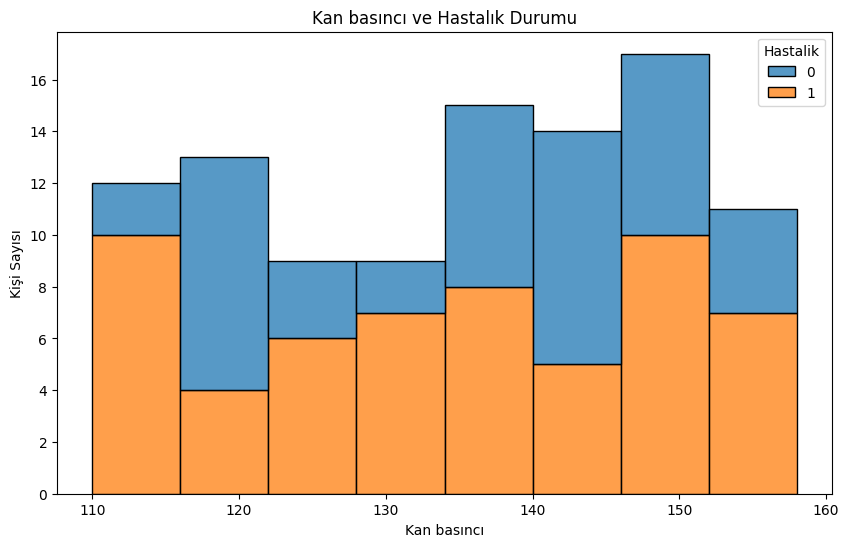

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Çalışma klasörünü ve dosya yolunu kontrol et
print("Aktif klasör:", Path.cwd())

# Excel dosyasının tam yolunu kur (notebooks klasöründen bir üstteki data klasörü)
excel_path = Path("../data/karar_agaci_veri_100.xlsx")

if not excel_path.exists():
    raise FileNotFoundError(f"Excel bulunamadı: {excel_path.resolve()}")

# 2. Excel dosyasını oku
df = pd.read_excel(excel_path, engine="openpyxl")
print("İlk 5 satır:")
print(df.head())

# 3. Görselleştirme
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Kan_Basinci', hue='Hastalik', multiple='stack', kde=False)
plt.title('Kan basıncı ve Hastalık Durumu')
plt.xlabel('Kan basıncı')
plt.ylabel('Kişi Sayısı')
plt.show()


plt.figure(figsize=(10,6))
Grafik boyutunu ayarlıyor (10x6 inç).
sns.histplot(...)
Histogram çiziyor:
data=df → verimiz bizim DataFrame.
x='Yas' → x ekseninde Yaş sütunu olacak.
hue='Hastalik' → farklı renkler ile hastalık durumunu ayıracak.
multiple='stack' → farklı grupları üst üste bindirip gösteriyor.
kde=False → ek olarak yoğunluk eğrisi (smooth line) çizme.
plt.title → grafiğe başlık ekliyor.
plt.xlabel ve plt.ylabel → x ve y eksenlerine etiket ekliyor.
plt.show() → grafiği ekrana basıyor.

## ML DOĞRULUĞUNU ÖLÇME

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.60      0.55      0.57        11

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



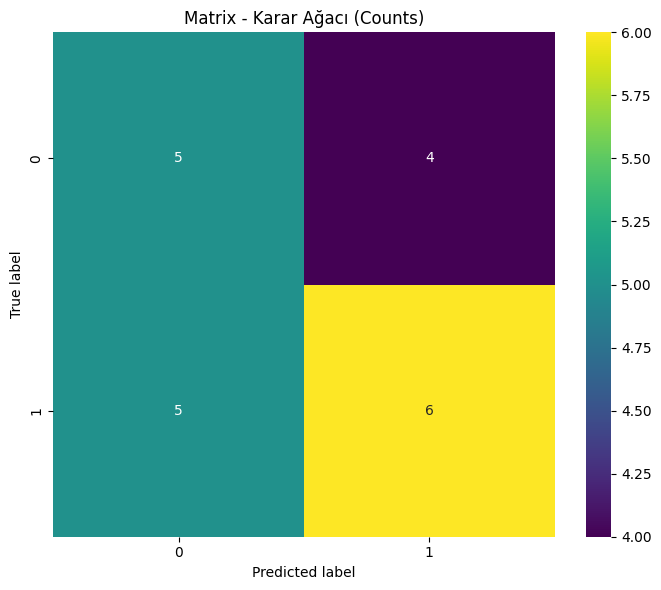

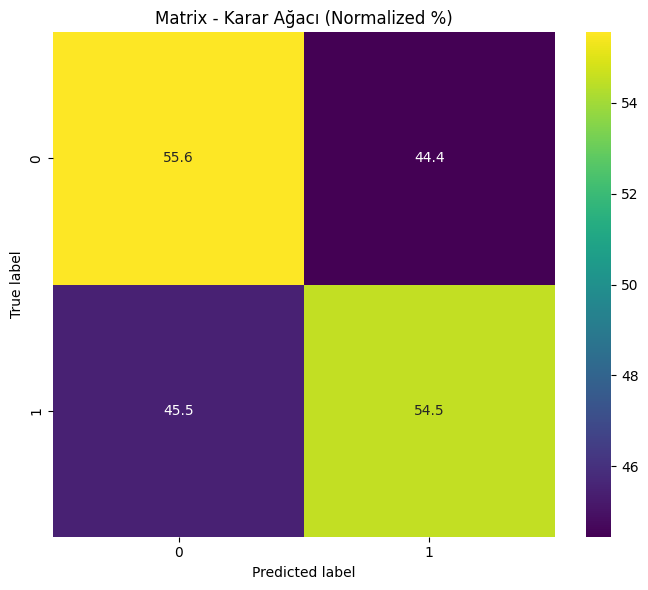

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ---- DOSYA YOLU ----
excel_path = Path("../data/karar_agaci_veri_100.xlsx")  # gerekirse tam yol yapıştır

if not excel_path.exists():
    raise FileNotFoundError(f"Excel bulunamadı -> {excel_path.resolve()}")

# ---- VERİYİ OKU ----
df = pd.read_excel(excel_path, engine="openpyxl")

X = df[['Yas', 'Kan_Basinci', 'Kolesterol']]
y = df['Hastalik']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- MODEL ----
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---- CONFUSION MATRIX (ham ve normalize) ----
labels = list(clf.classes_)
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels)
plt.title("Matrix - Karar Ağacı (Counts)")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()

cm_norm = (cm.astype(float) / cm.sum(axis=1, keepdims=True)) * 100
plt.figure(figsize=(7,6))
sns.heatmap(cm_norm, annot=True, fmt='.1f', cmap='viridis',
            xticklabels=labels, yticklabels=labels)
plt.title("Matrix - Karar Ağacı (Normalized %)")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()


Accuracy: tüm doğruların oranı.
classification_report: sınıf bazlı precision/recall/F1.
Confusion Matrix üretip çiziyor
cm = confusion_matrix(y_test, y_pred, labels=labels)
# ham sayılar
# normalize edilmiş (satıra göre yüzde)
Satırlar gerçek etiketler (True label), sütunlar tahmin (Predicted label).
Görseller ne anlatıyor?
1) “Counts” (ham sayılar) heatmap’i
Matrisin (satır=true, sütun=pred) kutuları:
[[ 5, 4 ],
 [ 5, 6 ]]

Bunları anlamlandırırsak (1 = hasta, 0 = sağlıklı olduğunu varsayalım):
TN = 5 (gerçek 0, tahmin 0) → sağlıklıyı doğru bulmuş.  TN (True Negative – Doğru Negatif)
FP = 4 (gerçek 0, tahmin 1) → sağlıklıya “hasta” demiş (yanlış alarm). FP (False Positive – Yanlış Pozitif / Type I Error)
FN = 5 (gerçek 1, tahmin 0) → hastayı kaçırmış (tehlikeli hata). FN (False Negative – Yanlış Negatif / Type II Error)
TP = 6 (gerçek 1, tahmin 1) → hastayı doğru yakalamış. TP (True Positive – Doğru Pozitif)
Toplam test örneği = 5+4+5+6 = 20
Accuracy = (TP+TN)/Toplam = (6+5)/20 = 11/20 = %55
Yorum: Model yalnızca şansa yakın (%50) bir performansın biraz üstünde. Hem FP hem FN sayıları yüksek; özellikle FN (hasta kaçırma) sağlıkta kritik.

## ÇAPRAZ BAĞLAMA İLE MAKİNE ÖĞRENMESİ ORANINI ARTTIRMA 

In [8]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 1) Excel yolunu otomatik çöz
candidates = [
    Path("data/karar_agaci_veri_100.xlsx"),    # proje kökü için
    Path("../data/karar_agaci_veri_100.xlsx"), # notebooks/ içinden
]
excel_path = next((p for p in candidates if p.exists()), None)
if excel_path is None:
    raise FileNotFoundError("Excel bulunamadı. data/ klasöründeki dosya adını aynen yaz: 'karar_agaci_veri_100.xlsx'")

# 2) Oku
df = pd.read_excel(excel_path, engine="openpyxl")

X = df[['Yas', 'Kan_Basinci', 'Kolesterol']]
y = df['Hastalik']

# 3) Model + 5-kat CV
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X, y, cv=5)

print("Her katmanın doğruluğu:", cv_scores)
print("Ortalama doğruluk:", cv_scores.mean())
print("Kullanılan yol:", excel_path.resolve())


Her katmanın doğruluğu: [0.55 0.25 0.7  0.35 0.5 ]
Ortalama doğruluk: 0.47000000000000003
Kullanılan yol: C:\Users\bunco\OneDrive\Masaüstü\20days-Nilay\data\karar_agaci_veri_100.xlsx


clf = DecisionTreeClassifier()
Bir karar ağacı sınıflandırıcısı oluşturuyor.
Henüz eğitilmedi, sadece model nesnesi tanımlandı.
cv_scores = cross_val_score(clf, X, y, cv=5)
cross_val_score fonksiyonu 5-katlı (cv=5) çapraz doğrulama yapıyor.
Veriyi 5 parçaya böler: her seferinde 4 parça eğitim, 1 parça test.
Böylece 5 farklı doğruluk değeri elde edersin.
cv_scores → numpy array mesela: [0.55 0.60 0.45 0.50 0.65]
print("Her katmanın doğruluğu:", cv_scores)
Yukarıdaki array’i ekrana basar.
Hangi fold’da kaç doğruluk elde ettiğini görürsün.
print("Ortalama doğruluk:", cv_scores.mean())
5 katmandan çıkan doğrulukların ortalamasını alır.
Bu sana modelin genel performansını verir.
Mesela yukarıdaki örnek için (0.55+0.60+0.45+0.50+0.65)/5 = 0.55
print("Kullanılan yol:", excel_path.resolve())
excel_path → dosyanın bulunduğu yol (biz yukarıda otomatik seçmiştik).
.resolve() → dosyanın tam yolunu verir (C:\Users... gibi).
Böylece hangi path üzerinden dosya okunduğunu net olarak görebiliyorsun.

ağaç girdilerini değiştirme 

In [4]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 1) Excel yolunu otomatik çöz
candidates = [
    Path("data/karar_agaci_veri_100.xlsx"),    # proje kökü için
    Path("../data/karar_agaci_veri_100.xlsx"), # notebooks/ içinden
]
excel_path = next((p for p in candidates if p.exists()), None)
if excel_path is None:
    raise FileNotFoundError("Excel bulunamadı. data/ klasöründeki dosya adını aynen yaz: 'karar_agaci_veri_100.xlsx'")

# 2) Oku
df = pd.read_excel(excel_path, engine="openpyxl")

X = df[['Yas', 'Kan_Basinci', 'Kolesterol']]
y = df['Hastalik']

# 3) Model + 5-kat CV
classifier = DecisionTreeClassifier(
    max_depth=2,            # ağacın derinliği (kaç seviye dallanacak)
    min_samples_split=5,    # bir node'u bölmek için gereken minimum örnek sayısı
    min_samples_leaf=2      # yaprak node'da bulunması gereken minimum örnek sayısı
)

cv_scores = cross_val_score(clf, X, y, cv=5)

print("Her katmanın doğruluğu:", cv_scores)
print("Ortalama doğruluk:", cv_scores.mean())
print("Kullanılan yol:", excel_path.resolve())


Her katmanın doğruluğu: [0.45 0.35 0.65 0.4  0.5 ]
Ortalama doğruluk: 0.47000000000000003
Kullanılan yol: C:\Users\bunco\OneDrive\Masaüstü\20days-Nilay\data\karar_agaci_veri_100.xlsx
